<a href="https://colab.research.google.com/github/speacock103/5610-project/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This codebook will go through various machine learning algorithms and apply them to the MNIST data set. The goal of this is to compare various types of algorthims performing an image classification task to see which will provide the best accuracies. 

# Importing MNIST data set

Imports for IO capabilites and to be able to place the data set into a pandas data frame

In [1]:
import io
import pandas as pd

Retreive the csv data set and place into seperate training and testing variables


In [2]:
from google.colab import files
uploaded = files.upload()

mnist_train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
mnist_test = pd.read_csv(io.BytesIO(uploaded['test.csv']))

Saving test.csv to test.csv
Saving train.csv to train.csv


Parse the training data into feature data and correct classification

In [3]:
mnist_train_x = mnist_train.drop("label", axis=1)
mnist_train_y = mnist_train["label"]

# Applying decision tree algorithm to MNIST

imports for decision tree model using scikit learn library

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from pydot import graph_from_dot_data

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


Fit decision tree model with mnist data set

In [5]:
dt = DecisionTreeClassifier()
dt.fit(mnist_train_x, mnist_train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

display decision tree

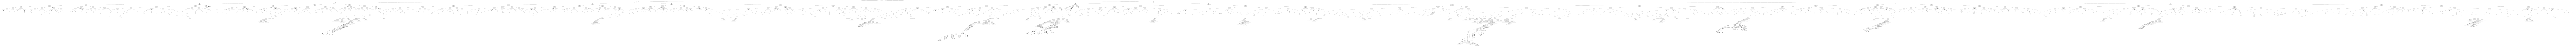

In [14]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=mnist_train_x.columns)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Testing the model with testing set

In [15]:
tree_pred = dt.predict(mnist_test)
tree_pred

array([2, 6, 9, ..., 3, 9, 2])

Placing prediction values into data frame and exporting csv of predictions

In [16]:
image_id = []
for i in range(1,28001):
  image_id.append(i)

In [17]:
pred_df = pd.DataFrame(image_id, columns = ['ImageId'])
pred_df['Label'] = tree_pred

In [18]:
pred_df

,ImageId,Label
0,1,2
1,2,6
2,3,9
3,4,9
4,5,9
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [ ]:
pred_df.to_csv('dtout.csv', index=False)
from google.colab import files
files.download("dtout.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Naive Bayes

Imports for gausian naive bayes model using scikit learn library

In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn import preprocessing

Fit model with mnist training set

In [20]:
mnist_nb = GaussianNB()
mnist_nb.fit(mnist_train_x, mnist_train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

Test model using testing data set

In [21]:
nb_predict = mnist_nb.predict(mnist_test)
nb_predict

array([0, 0, 9, ..., 8, 9, 0])

Placing prediction values into data frame and exporting csv of predictions

In [22]:
pred_nb_df = pd.DataFrame(image_id, columns = ['ImageId'])
pred_nb_df['Label'] = nb_predict

In [23]:
pred_nb_df.to_csv('nbout.csv', index=False)
from google.colab import files
files.download("nbout.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Linear Regression

Imports linear regression model using scikit learn library

In [24]:
from sklearn.linear_model import LinearRegression

Fit model with mnist training set

In [25]:
mnist_linreg = LinearRegression()
mnist_linreg.fit(mnist_train_x, mnist_train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Test model using testing data set

In [26]:
linreg_predict = mnist_linreg.predict(mnist_test)
linreg_predict

array([ 1.43830629, -0.05883316,  6.57150978, ...,  3.45754288,
        6.89321758,  2.57001091])

Placing prediction values into data frame and exporting csv of predictions

In [27]:
pred_linreg_df = pd.DataFrame(image_id, columns = ['ImageId'])
pred_linreg_df['Label'] = linreg_predict

In [28]:
pred_linreg_df.to_csv('linregout.csv', index=False)
from google.colab import files
files.download("linregout.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Logistic Regression

Imports logistic regression model using scikit learn library

In [29]:
from sklearn.linear_model import LogisticRegression

Fit model with mnist training set

In [30]:
mnist_logreg = LogisticRegression()
mnist_logreg.fit(mnist_train_x, mnist_train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Test model using testing data set

In [31]:
logreg_pred = mnist_logreg.predict(mnist_test)
logreg_pred

array([2, 0, 9, ..., 3, 9, 2])

Placing prediction values into data frame and exporting csv of predictions

In [33]:
pred_logreg_df = pd.DataFrame(image_id, columns = ['ImageId'])
pred_logreg_df['Label'] = logreg_pred

In [34]:
pred_logreg_df.to_csv('logregout.csv', index=False)
from google.colab import files
files.download("logregout.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>